In [1]:
import networkx as nx
import pynauty as na
import numpy as np
import networkx.algorithms.isomorphism as iso
import matplotlib.pyplot as plt
import random
import lift as lt
%matplotlib inline

### Multiprocessing for parallel comp

In [20]:
deg = [[1,2,3],[3,4,5]]

In [22]:
def f(a,b,c):
    return a + b + c

f(*deg[1])

12

In [ ]:
import multiprocessing as mp
import random 
from functools import partial

lift = lt.Lift("bio-celegansneural", 3)
lift.get_graphlet_count()

with mp.Pool() as p:
    subgraphs = p.map(lift.graph.subgraph, lift.graphlet_samples)
    subgraphs = p.map(nx.Graph, subgraphs)
    method = partial(lt.find_type_match, lift.nx_graphlet_dict, lift.na_graphlet_cert_dict)
    types = p.map(method, subgraphs)
    method = partial(lt.get_degree_list, lift.graph)
    degree_lists = p.map(method, [ e[1] for e in types ])


> /Users/dmitron/Documents/GradSchool/GraphletLift/code/LiftSRW/lift.py(557)_get_graphlet_count_unordered()
-> types = p.map(_mp_find_type, subgraphs)


(Pdb)  subgraphs[0].nodes()


NodeView(('105', '132', '219'))


(Pdb)  n


> /Users/dmitron/Documents/GradSchool/GraphletLift/code/LiftSRW/lift.py(558)_get_graphlet_count_unordered()
-> _mp_get_degree_list = partial(


(Pdb)  n


> /Users/dmitron/Documents/GradSchool/GraphletLift/code/LiftSRW/lift.py(559)_get_graphlet_count_unordered()
-> get_degree_list, self.graph


(Pdb)  n


> /Users/dmitron/Documents/GradSchool/GraphletLift/code/LiftSRW/lift.py(561)_get_graphlet_count_unordered()
-> degree_lists = p.map(


(Pdb)  n


> /Users/dmitron/Documents/GradSchool/GraphletLift/code/LiftSRW/lift.py(562)_get_graphlet_count_unordered()
-> _mp_get_degree_list, [e[1] for e in types]


(Pdb)  n


> /Users/dmitron/Documents/GradSchool/GraphletLift/code/LiftSRW/lift.py(564)_get_graphlet_count_unordered()
-> import pdb; pdb.set_trace()


(Pdb)  degree_lists


[[12, 11, 22], [28, 31, 19], [49, 14, 15], [17, 23, 17], [8, 20, 15], [52, 46, 7], [12, 31, 20], [19, 12, 27], [36, 13, 4], [17, 17, 36], [14, 29, 77], [16, 20, 20], [37, 11, 15], [7, 9, 8], [53, 19, 52], [21, 16, 23], [22, 33, 53], [21, 54, 24], [19, 19, 15], [77, 5, 6], [8, 11, 134], [20, 17, 11], [36, 16, 21], [19, 5, 10], [31, 2, 24], [11, 53, 14], [54, 12, 12], [134, 11, 17], [19, 19, 11], [54, 74, 17], [74, 10, 9], [134, 11, 21], [74, 26, 13], [53, 30, 29], [21, 16, 17], [36, 18, 19], [46, 15, 14], [134, 11, 4], [37, 19, 11], [36, 12, 15], [14, 13, 11], [134, 11, 6], [134, 10, 10], [18, 29, 18], [51, 4, 22], [52, 27, 52], [12, 15, 52], [33, 15, 10], [14, 15, 24], [19, 12, 22], [20, 16, 23], [32, 20, 24], [134, 15, 19], [11, 10, 10], [53, 51, 14], [21, 19, 21], [13, 5, 16], [16, 19, 15], [134, 9, 12], [10, 10, 15], [27, 52, 24], [23, 9, 21], [36, 12, 13], [11, 11, 20], [7, 14, 11], [54, 14, 16], [16, 13, 134], [15, 16, 8], [22, 31, 19], [12, 52, 134], [22, 31, 17], [15, 14, 10], [

(Pdb)  n


> /Users/dmitron/Documents/GradSchool/GraphletLift/code/LiftSRW/lift.py(566)_get_graphlet_count_unordered()
-> (e[0], self.prob_functions[e[0]](*degree_lists[i]))


(Pdb)  n


> /Users/dmitron/Documents/GradSchool/GraphletLift/code/LiftSRW/lift.py(567)_get_graphlet_count_unordered()
-> for i, e in enumerate(types)


(Pdb)  n


> /Users/dmitron/Documents/GradSchool/GraphletLift/code/LiftSRW/lift.py(576)_get_graphlet_count_unordered()
-> return (samples, graphlet_samples)


(Pdb)  types


[(0, {'105': 1, '132': 0, '219': 2}), (0, {'191': 1, '206': 2, '205': 0}), (0, {'193': 1, '118': 0, '161': 2}), (0, {'49': 1, '53': 0, '10': 2}), (0, {'137': 0, '103': 1, '116': 2}), (0, {'138': 1, '4': 0, '197': 2}), (0, {'191': 1, '186': 0, '200': 2}), (0, {'233': 1, '208': 2, '220': 0}), (0, {'7': 0, '92': 1, '95': 2}), (1, {'44': 0, '36': 1, '7': 2}), (1, {'130': 0, '2': 1, '13': 2}), (0, {'19': 0, '24': 1, '48': 2}), (0, {'239': 1, '117': 2, '143': 0}), (0, {'128': 1, '97': 0, '61': 2}), (0, {'4': 2, '87': 0, '202': 1}), (0, {'47': 1, '49': 2, '88': 0}), (1, {'94': 0, '115': 1, '87': 2}), (1, {'72': 0, '5': 1, '15': 2}), (0, {'21': 1, '75': 0, '78': 2}), (0, {'184': 1, '13': 0, '262': 2}), (1, {'250': 0, '177': 1, '45': 2}), (1, {'109': 0, '106': 1, '108': 2}), (0, {'7': 0, '73': 1, '104': 2}), (0, {'17': 0, '93': 1, '121': 2}), (0, {'191': 0, '81': 1, '227': 2}), (0, {'181': 0, '85': 1, '180': 2}), (0, {'174': 1, '5': 0, '183': 2}), (0, {'45': 0, '211': 1, '51': 2}), (0, {'21': 1

Process ForkPoolWorker-4:
Process ForkPoolWorker-2:
Process ForkPoolWorker-3:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/dmitron/.pyenv/versions/3.5.2/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/dmitron/.pyenv/versions/3.5.2/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/dmitron/.pyenv/versions/3.5.2/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/dmitron/.pyenv/versions/3.5.2/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/dmitron/.pyenv/versions/3.5.2/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/dmitron/.pyenv/versions/3.5.2/lib/python3.5/multiprocessing/process.py", line 93, i

(Pdb)  q


In [49]:
[ i, e for i, e in enumerate(types) ]

SyntaxError: invalid syntax (<ipython-input-49-757d334a4845>, line 1)

In [51]:
samples = [
        lift.prob_functions[e[0]](*degree_lists[i])
        for i, e in enumerate(types)
        ]

In [52]:
samples

[1.0826729028625872e-05,
 2.2802417056207958e-05,
 2.504749004111796e-05,
 3.0488158979779093e-05,
 2.170040322377153e-05,
 8.676146944303369e-05,
 4.267251451701291e-05,
 2.8215112013994695e-05,
 1.9216292246127025e-05,
 1.8629425699516305e-05,
 3.214507404451539e-05,
 0.00011444754810676597,
 1.2434544557449585e-05,
 3.27986202926019e-05,
 2.0783453046022878e-05,
 2.3680540440316977e-05,
 2.2439370443185675e-05,
 4.3330350592920425e-05,
 0.0001113489241980862,
 1.5676392880441027e-05,
 6.613084825375328e-05,
 2.5863852679495136e-05,
 0.00011652227889779504,
 3.060184293328196e-05,
 4.600722970752547e-05,
 2.740896595645199e-05,
 4.2126892685551906e-05,
 2.8819721557151725e-05,
 6.193379285746688e-06,
 1.0357048903913514e-05,
 2.3874325550303202e-05,
 4.312457120454768e-05,
 2.4646730200460072e-05,
 1.5594381762636772e-05,
 4.856865890385444e-05,
 2.2307572936064556e-05,
 1.651195114566639e-05,
 1.530092146664098e-05,
 6.031169855013906e-05,
 5.466092090751049e-05,
 9.806710807641907e

In [35]:
samples

[2.2439370443185675e-05,
 4.07909905116609e-05,
 3.617905492117062e-05,
 3.886324993927617e-05,
 1.3301409949454642e-05,
 1.745810055865922e-05,
 2.661866434196998e-05,
 1.3477441842913099e-05,
 1.558758978451716e-05,
 1.6096490132574023e-05,
 5.484920482030865e-05,
 1.744179981117214e-05,
 3.1036623215394166e-05,
 2.699403783859913e-05,
 4.244658027547188e-05,
 4.3330350592920425e-05,
 3.2454161294943416e-05,
 3.602465194643966e-05,
 6.311761577384951e-05,
 2.4656272101428116e-05,
 1.228533002276019e-05,
 4.474368061649693e-05,
 0.00013790432374066947,
 6.299704182336123e-05,
 2.518322497740316e-05,
 4.702518668999116e-05,
 2.1161334010496022e-05,
 1.986845825783319e-05,
 6.270664690457188e-06,
 2.9354835750520588e-05,
 2.2157161493342894e-05,
 4.1566906092045756e-05,
 3.9639165519661024e-05,
 1.808129067412669e-05,
 2.3575260171608043e-05,
 1.2308338272150828e-05,
 5.187549880287311e-05,
 2.2083421923805005e-05,
 6.319674410374377e-05,
 1.0592978059294195e-05,
 6.747211887710512e-05,

In [19]:
lift.prob_functions[0]

<function _lambdifygenerated(x_0, x_1, x_2)>

### Testing updating counts for bio-celegansneural k >= 5

In [2]:
# Testing doing sequences of liftings
lift = lt.Lift("bio-celegansneural", 5)
diff = 10
NUM_STEPS = 5000
prev_counts = lift.get_graphlet_count(num_steps=NUM_STEPS)
while diff > 5 * 10**(-2):
    current_counts = lift.get_graphlet_count(num_steps=NUM_STEPS)
    diff = (
        np.linalg.norm([
            (prev_counts[key] - current_counts[key])
            for key in prev_counts.keys()])
        / np.linalg.norm([
            prev_counts[key]
            for key in prev_counts.keys()])
        )
    prev_counts = current_counts

print("Samples taken to converge to 5% accuracy:", lift.total_samples)

Samples taken to converge to 5% accuracy: 10000


In [3]:
graphlet_types = [lt.get_graphlet_prob(lift, graphlet)[0] 
                  for graphlet in lift.graphlet_samples]
print(np.bincount(graphlet_types[:NUM_STEPS]))
print(np.bincount(graphlet_types[NUM_STEPS:]))

TypeError: get_graphlet_prob() missing 3 required positional arguments: 'na_graphlet_cert_dict', 'prob_functions', and 'graphlet_nodes'

True counts from ESCAPE. 

- 4-star: 12590985
- 4-path: 6051046
- 5-cycle: 89226
- Hourglass: 154327

Index to name matches:
- 0 - 4-star
- 2 - 4-path
- 7 - 5-cycle
- 10 - hourglass

In [61]:
print(prev_counts[0], prev_counts[2], prev_counts[7], 
      prev_counts[10] )

12243552 6543023 92598 164350


### Testing update counts on a bigger graph: as-caida

In [69]:
# Testing doing sequences of liftings
lift = lt.Lift("as-caida", 3)
diff = 10
NUM_STEPS = 5000
current_counts = lift.get_graphlet_count(num_steps=NUM_STEPS)
while diff > 5 * 10**(-2):
    prev_counts = current_counts
    current_counts = lift.get_graphlet_count(num_steps=NUM_STEPS)
    diff = (
        np.linalg.norm([
            (prev_counts[key] - current_counts[key])
            for key in prev_counts.keys()])
        / np.linalg.norm([
            prev_counts[key]
            for key in prev_counts.keys()])
        )

print("Samples taken to converge to 5% accuracy:", lift.total_samples)

Samples taken to converge to 5% accuracy: 10000


In [74]:
prev_counts

{'triangle': 51162, 'wedge': 13985461}

In [75]:
current_counts

{'triangle': 41832, 'wedge': 14189280}

In [76]:
graphlet_types = [lt.get_graphlet_prob(lift, graphlet)[0] 
                  for graphlet in lift.graphlet_samples]
print(np.bincount(graphlet_types[:NUM_STEPS]))
print(np.bincount(graphlet_types[NUM_STEPS:]))

[4894  106]
[4903   97]


### Testing the index and naming
All is well.

In [4]:
graph = lt.load_graph_fromfile("bio-celegansneural")
lift = lt.Lift(graph, k=5)

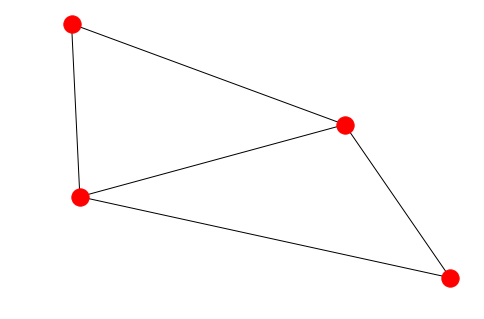

In [22]:
nx.draw(lift.nx_graphlet_dict[4][4])

### Dependence on num_steps for celegans network.

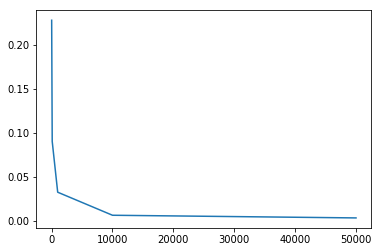

In [65]:
GRAPH = lt.load_graph_fromfile("bio-celegansneural")
K = 3
TRUE_COUNTS = {
    'wedge': 44081,
    'triangle': 3241
}
NUM_RUNS = 10
STEPS = [10, 100, 1000, 10000, 50000]

experiments = [[lt.Lift(GRAPH, K).graphlet_count(num_steps=step)
                for i in range(NUM_RUNS)]
               for step in STEPS]
error_rate = [
    sum(
        [np.linalg.norm(
            [run[key] - TRUE_COUNTS[key] 
             for key in TRUE_COUNTS.keys()]
        ) for run in experiment]
    )
    / num_runs
    / np.linalg.norm(
        [TRUE_COUNTS[key]
         for key in TRUE_COUNTS.keys()])
    for experiment in experiments 
]

plt.plot(STEPS, error_rate)

In [66]:
min_steps = steps[np.min(np.where(np.array(error_rate) < .1))]
print("Minimum steps needed to get 10% accuracy: ",
      min_steps)

Minimum steps needed to get 10% accuracy:  100


In [67]:
print("Speed of the sampling procedure:")
%timeit lt.Lift(GRAPH, K).graphlet_count(num_steps=min_steps)

Speed of the sampling procedure:
186 ms ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
print("Approximately 2ms per sample.")

Approximately 2ms per sample.


### Celegansneural and k=4.

Minimum steps needed to get 10% accuracy:  1000
Speed of the sampling procedure:
421 ms ± 3.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


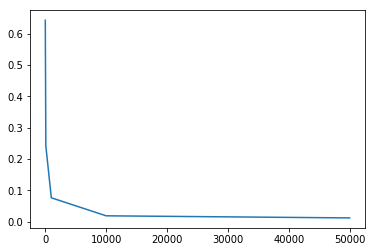

In [71]:
GRAPH = lt.load_graph_fromfile("bio-celegansneural")
K = 4
TRUE_COUNTS = {
    '3-star': 650925,
    '4-path': 516426,
    '4-tailedtriangle': 186292,
    '4-cycle': 15863,
    '4-chordcycle': 22743,
    '4-clique': 2010
}
NUM_RUNS = 10
STEPS = [10, 100, 1000, 10000, 50000]

experiments = [[lt.Lift(GRAPH, K).graphlet_count(num_steps=step)
                for i in range(NUM_RUNS)]
               for step in STEPS]
error_rate = [
    sum(
        [np.linalg.norm(
            [run[key] - TRUE_COUNTS[key] 
             for key in TRUE_COUNTS.keys()]
        ) for run in experiment]
    )
    / num_runs 
    / np.linalg.norm(
        [TRUE_COUNTS[key] 
         for key in TRUE_COUNTS.keys()])
    for experiment in experiments 
]

min_steps = steps[np.min(np.where(np.array(error_rate) < .1))]
print("Minimum steps needed to get 10% accuracy: ",
      min_steps)
print("Speed of the sampling procedure:")
%timeit lt.Lift(GRAPH, K).graphlet_count(num_steps=min_steps)

plt.plot(STEPS, error_rate)

In [72]:
error_rate

[0.6428207469947186,
 0.24166797905598497,
 0.07658217464334786,
 0.019115356904939148,
 0.01238369077437654]

In [ ]:
accurate_num_steps = {
    "bio-celegans": {
        3: 100,
        4: 1000
    }
}

### Here we see a 5x speed gain when doing find_type_match with pynauty over networkx.

In [2]:
num_graphs = 1000
graph_size = 3
random_nx_graphs = [nx.gnp_random_graph(graph_size,0.6) for i in range(num_graphs)]
random_na_graphs = [na.Graph(number_of_vertices = graph_size, directed = False,
                             adjacency_dict = { n: list(nbrdict.keys()) for n, nbrdict in graph.adjacency() }) 
                    for graph in random_nx_graphs]

%time nx_iso = [nx.is_isomorphic(random_nx_graphs[i],random_nx_graphs[j]) 
          for i in range(num_graphs) 
          for j in range(i,num_graphs)]

%time na_iso = [na.certificate(random_na_graphs[i]) == na.certificate(random_na_graphs[j]) 
          for i in range(num_graphs) 
          for j in range(i,num_graphs)]

### Here we show that simply using pynauty to do isomorphism gets a 4x speedup over Kirill's code.

In [3]:
def find_type_match(graph, graphlet_list):
    """
    Given a graph, find an isomorphism with one of the canonical graphs from
    'graphlet_list'.
    Return index of the corresponding graph from 'graphlet_list' and a
    match dictionary.
    The match dictionary has format {u_i: v_i}, 'u_i' are nodes from 'graph'
    and 'v_i' are nodes from canonical graph.
    Helper function for 'prob_functions' for unordered method.
    """
    nodes = graph.nodes()
    n = len(nodes)
    if n == 1:
        # trivial graph: just send it to zero!
        return (0, {u: 0 for u in nodes})
    if n == 2:
        # 2-path graph: both nodes are equal, pick a random isomorphism
        return (0, {u: i for i, u in enumerate(nodes)})
    if n == 3:
        if graph.number_of_edges() == 2:
            # wedge-graph: find root, other two are arbitrary
            u0 = next((node for node in nodes if graph.degree(node) == 2))
            (u1, u2) = (node for node in graph.neighbors(u0))
            return (0, {u0: 0, u1: 1, u2: 2})
        if graph.number_of_edges() == 3:
            # triangle: all three are arbitrary
            return (1, {u: i for i, u in enumerate(nodes)})
    if n == 4:
        e_num = graph.number_of_edges()
        max_degree = max((graph.degree(node) for node in nodes))
        if e_num == 3 and max_degree == 3:
            u3 = next((node for node in nodes if graph.degree(node) == 3))
            (u0, u1, u2) = tuple(graph.neighbors(u3))
            return (0, {u0: 0, u1: 1, u2: 2, u3: 3})
        if e_num == 3 and max_degree == 2:
            (u0, u1) = (node for node in nodes if graph.degree(node) == 2)
            u2 = next((node for node in graph.neighbors(u1) if node != u0))
            u3 = next((node for node in graph.neighbors(u0) if node != u1))
            return (1, {u0: 0, u1: 1, u2: 2, u3: 3})
        if e_num == 4 and max_degree == 3:
            u3 = next((node for node in nodes if graph.degree(node) == 3))
            (u1, u2) = (node for node in nodes if graph.degree(node) == 2)
            u0 = next((node for node in nodes if graph.degree(node) == 1))
            return (2, {u0: 0, u1: 1, u2: 2, u3: 3})
        if e_num == 4 and max_degree == 2:
            u0 = next((node for node in nodes))
            (u1, u3) = tuple(graph.neighbors(u0))
            u2 = next((node for node in graph.neighbors(u1) if node != u0))
            return (3, {u0: 0, u1: 1, u2: 2, u3: 3})
        if e_num == 5:
            (u0, u2) = (node for node in nodes if graph.degree(node) == 3)
            (u1, u3) = (node for node in nodes if graph.degree(node) == 2)
            return (4, {u0: 0, u1: 1, u2: 2, u3: 3})
        if e_num == 6:
            (u0, u1, u2, u3) = tuple(nodes)
            return (5, {u0: 0, u1: 1, u2: 2, u3: 3})
        raise ValueError("wrong graphlet format")

    # Improve matching procedure here for n>4.
    for (i, graph_) in enumerate(graphlet_list):
        graph_matcher = iso.GraphMatcher(graph, graph_)
        if graph_matcher.is_isomorphic():
            break
    #assert graph_id[1].is_isomorphic()
    return (i, graph_matcher.mapping)

def get_graphlet_list(k):
    """
    Generate list of all graphlets of size 'k'.
    List is taken from graph_atlas of networkx.
    """
    from networkx.generators.atlas import graph_atlas_g
    assert k > 0
    atlas = graph_atlas_g()[1:]
    graphlet_list = []
    for graph in atlas:
        n = graph.number_of_nodes()
        if n < k:
            continue
        if n > k:
            break
        if nx.is_connected(graph):
            graphlet_list.append(graph)
    return graphlet_list

def nxgraph_to_nagraph(nxgraph):
    return na.Graph(number_of_vertices = graphlet_size, 
                    directed = False,
                    adjacency_dict = { n: list(nbrdict.keys()) 
                                       for n, nbrdict in nxgraph.adjacency() }
                    )

def find_type_match2(graph, na_graphlet_list, nx_graphlet_list):
    import networkx.algorithms.isomorphism as iso
    
    for i, graph2 in enumerate(na_graphlet_list):
        if na.certificate(graph) == na.certificate(graph2):
            break
    
    G1 = nx.from_dict_of_lists(graph.adjacency_dict)
    G2 = nx_graphlet_list[i]
    matcher = iso.GraphMatcher(G1, G2)
    mapping = next(matcher.match())
    return (i, mapping)

In [117]:
graphlet_size = 5
nx_graphlet_list = get_graphlet_list(graphlet_size)
na_graphlet_list = [ nxgraph_to_nagraph(graph) for graph in nx_graphlet_list ]
num_graphs = 500
random_nx_graphs = [ random.choice(nx_graphlet_list) for i in range(num_graphs) ]
random_na_graphs = [ nxgraph_to_nagraph(graph) for graph in random_nx_graphs ]

In [118]:
%%time
nx_types = [ find_type_match(graph, nx_graphlet_list) for graph in random_nx_graphs ]

CPU times: user 489 ms, sys: 8.57 ms, total: 498 ms
Wall time: 532 ms


In [119]:
%%time
na_types = [ find_type_match2(graph, na_graphlet_list, nx_graphlet_list) for graph in random_na_graphs ]

CPU times: user 267 ms, sys: 5.12 ms, total: 272 ms
Wall time: 292 ms


In [97]:
for i, graph2 in enumerate(na_graphlet_list):
    if na.certificate(random_na_graphs[0]) == na.certificate(graph2):
        break
G1 = nx.from_dict_of_lists(random_na_graphs[0].adjacency_dict)
G2 = nx_graphlet_list[i]
find_type_match2(random_na_graphs[0], na_graphlet_list, nx_graphlet_list)
print(iso.is_isomorphic(G1, G2))

True


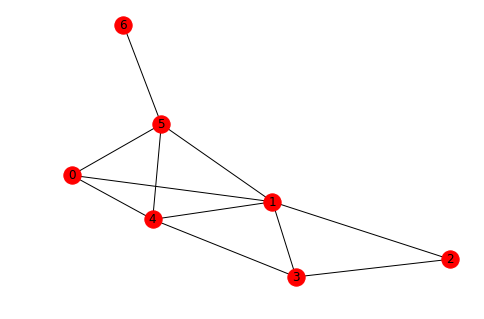

In [98]:
nx.draw(G1,with_labels=True)

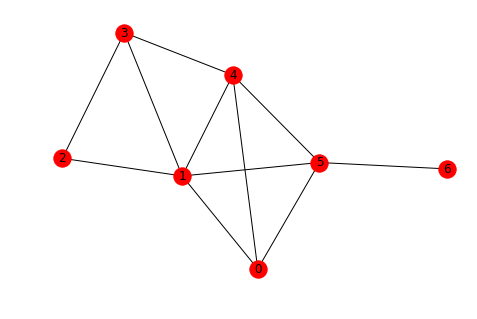

In [99]:
nx.draw(G2,with_labels=True)

# Test NetworkX subgraphing vs Kirill's code.
NetworkX is faster.

In [18]:
def get_subgraph(graph, nodes):
    """
    Manually constructs the induced subgraph given a list of nodes from the full graph.
    Returns a new networkx graph object.
    Helper function for shotgun method and probability functions in the unordered method.

    NOTE:
        We use this because the networkx subgraph method is very slow.
    """
    list_nodes = list(nodes)
    subgraph = nx.Graph()
    subgraph.add_nodes_from(nodes)
    for i, node in enumerate(list_nodes):
        neighbors = list(graph.neighbors(node))
        for j in range(i+1, len(list_nodes)):
            if list_nodes[j] in neighbors:
                subgraph.add_edge(node, list_nodes[j])
    return subgraph

graph = lt.load_graph_fromfile("bio-celegansneural")

n = 100
k = 5
lift_unordered = lt.Lift(graph,k)
vertex_sets = [lift_unordered.sample_unordered_lift(lt.sample_vertex(graph))
               for j in range(n)]

nx_subg = [nx.to_dict_of_dicts(graph.subgraph(vertex_set)) 
           for vertex_set in vertex_sets]
k_subg = [nx.to_dict_of_dicts(get_subgraph(graph, vertex_set)) 
          for vertex_set in vertex_sets]

print("Are methods equal?", all([ nx_subg[i] == k_subg[i] for i in range(n) ]))

graph = lt.load_graph_fromfile("bio-celegansneural")

n = 20
k = 5
lift_unordered = lt.Lift(graph,k)
vertex_sets = [lift_unordered.sample_unordered_lift(lt.sample_vertex(graph))
               for j in range(n)]

print("bio-celegansneural")
print("NetworkX performance:")
%timeit nx_subg = [ graph.subgraph(vertex_set) for vertex_set in vertex_sets ]
print("Kirill performance:")
%timeit k_subg = [ get_subgraph(graph, vertex_set) for vertex_set in vertex_sets ]

graph = lt.load_graph_fromfile("misc-polblogs")

n = 20
k = 5
lift_unordered = lt.Lift(graph,k)
vertex_sets = [lift_unordered.sample_unordered_lift(lt.sample_vertex(graph))
               for j in range(n)]

print("misc-polblogs")
print("NetworkX performance:")
%timeit nx_subg = [ graph.subgraph(vertex_set) for vertex_set in vertex_sets ]
print("Kirill performance:")
%timeit k_subg = [ get_subgraph(graph, vertex_set) for vertex_set in vertex_sets ]

Are methods equal? True
bio-celegansneural
NetworkX performance:
222 µs ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Kirill performance:
580 µs ± 60.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
misc-polblogs
NetworkX performance:
256 µs ± 47.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Kirill performance:
1.04 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
